<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fraud.csv to fraud.csv


데이터 불러오고 첫 행 다섯 개 확인

In [13]:
import pandas as pd

df = pd.read_csv("fraud.csv")
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


데이터 구조 및 결측치 확인

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

전체 컬럼 목록 확인

In [15]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

불필요해보이는 컬럼 제거    
사기 여부와 직접적으로 관련이 없어보여서 삭제함

In [16]:
df = df.drop(columns=['first', 'last', 'street', 'city', 'state', 'zip'])

In [17]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


개인정보 보호를 위해 카드 번호 마스킹    
(cc_num을 처음에 drop했으나 나중에 다시 필요해져서 살림)

In [18]:
df["cc_num_masked"] = df["cc_num"].astype(str).apply(
    lambda x: x[:4] + "*" * (len(x) - 4)
)
# df.drop(columns=["cc_num"], inplace=True)


In [19]:
df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
lat,0
long,0
city_pop,0
job,0


In [20]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_num_masked
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,6304********
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,4956***************
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,1800***********
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,3749***********
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,2712************
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0,6011************
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0,2131***********
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,3556************
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,6011************


trans_num, unix_time도 불필요해보여서 뒤늦게 제거

In [21]:
df.drop(columns=["trans_num"], inplace=True)

In [22]:
df.drop(columns=["unix_time"], inplace=True)

생년월일은 너무 직접적인 정보이고 실제로 age(나이) 정도가 적절한 정보같아서    
연도로 변환한 뒤 현재 연도에서 그 연도를 빼서 새로운 컬럼(age)을 만듦    
그리고 dob열은 제거하였음

In [23]:
df["dob"] = pd.to_datetime(df["dob"])
df["age"] = 2019 - df["dob"].dt.year
df.drop(columns=["dob"], inplace=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,cc_num_masked,age
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,6304********,41
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,40.079588,-74.848087,0,4956***************,39
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,40.021888,-74.228188,0,1800***********,45
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,42.360426,-83.552316,0,3749***********,48
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",29.737426,-90.853194,0,2712************,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,34.853497,-78.664158,0,6011************,36
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),35.008839,-81.475156,0,2131***********,35
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,3556************,20
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,6011************,38


### 거래 시간에서 파생된 변수 생성
'시간', '요일', '야간 여부'를 파생 변수로 생성했다.    
사기 거래가 밤에 더 잘 발생할 수도 있다고 가정하였기 때문에 그것을 확인하기 위함이다.

In [24]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["hour"] = df["trans_date_trans_time"].dt.hour
df["weekday"] = df["trans_date_trans_time"].dt.weekday
df["is_night"] = df["hour"].between(0, 6).astype(int)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,cc_num_masked,age,hour,weekday,is_night
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,6304********,41,0,1,1
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,40.079588,-74.848087,0,4956***************,39,0,1,1
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,40.021888,-74.228188,0,1800***********,45,0,1,1
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,42.360426,-83.552316,0,3749***********,48,0,1,1
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",29.737426,-90.853194,0,2712************,42,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,34.853497,-78.664158,0,6011************,36,23,3,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),35.008839,-81.475156,0,2131***********,35,23,3,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,3556************,20,23,3,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,6011************,38,23,3,0


### 파생 변수(is_night, 야간 거래 여부)를 통해 사기 발생 비율 비교
밤에 이루어지는 전체 거래 수 자체가 낮에 이루어지는 전체 거래 수와 다르므로    
각각 비율을 계산하였다.

야간 시간대에 사기 발생율이 더 높은지 확인하려고 하였다.

In [25]:
# 밤 전체 거래 수
night_total = df[df["is_night"] == 1].shape[0]

# 낮 전체 거래 수
day_total = df[df["is_night"] == 0].shape[0]

# 밤 사기 건수
night_fraud = df[(df["is_night"] == 1) & (df["is_fraud"] == 1)].shape[0]

# 낮 사기 건수
day_fraud = df[(df["is_night"] == 0) & (df["is_fraud"] == 1)].shape[0]

# 비율 계산
p_fraud_night = night_fraud / night_total
p_fraud_day = day_fraud / day_total

p_fraud_night, p_fraud_day

(0.0073042570899740375, 0.0015975335640340644)

- 이상치의 영향을 완화하고 안정성을 향상하기 위해 거래 금액 로그 변환을 시행    
- 거래 금액이 전체 중앙값보다 높은지 나타내는 고액 거래 여부 플래그를 생성    
  - 사기 거래가 상대적으로 고액에 발생하는 경향이 있다는 도메인 지식이 존재하므로

In [27]:
import numpy as np

df["amt_log"] = np.log1p(df["amt"])
df["high_amt_flag"] = (df["amt"] > df["amt"].median()).astype(int)

고액 거래 여부가 실제로 사기 거래와 관련 있는지 확인하기 위한 코드

In [28]:
df.groupby("high_amt_flag")["is_fraud"].mean()

,is_fraud
high_amt_flag,
0,0.001340
1,0.003726


사기 여부에 따른 거래 금액 분포
- 중앙값이 다르다 (사기 거래의 중앙값이 확실히 더 높음)
- box 크기(사분위 범위)가 다르다 - 사기 거래의 경우 위쪽으로 더 치우쳐 있음
- 정상 거래에서 작고 많은 점이 위에 찍혀있음 - 정상 거래 중에도 종종 고액 결제가 발생, 그렇지만 사기 거래는 이미 고액 위주라 extreme outlier가 적음

<Axes: xlabel='is_fraud', ylabel='amt_log'>

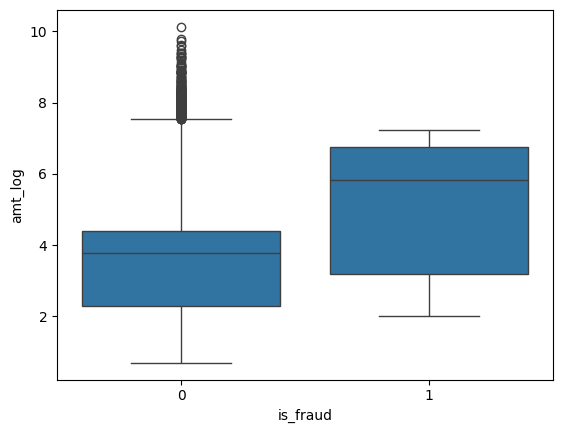

In [29]:
import seaborn as sns

sns.boxplot(x="is_fraud", y="amt_log", data=df)

### 고객 위치와 가맹점 위치 간 거리 계산 (Haversine 이용)
고객의 위도, 경도와 가맹점의 위도, 경도를 이용하여 두 지점 간의 실제 거리를 계산    
비정상적인 위치에서 발생한 거래를 탐지하기 위한 피처로 활용

In [30]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df["distance"] = haversine(df["lat"], df["long"], df["merch_lat"], df["merch_long"])
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,...,merch_long,is_fraud,cc_num_masked,age,hour,weekday,is_night,amt_log,high_amt_flag,distance
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,...,-118.186462,0,6304********,41,0,1,1,4.684259,1,30.212176
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,M,40.6747,-74.2239,124967,Operational researcher,...,-74.848087,0,4956***************,39,0,1,1,3.822317,1,84.702120
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,F,40.6152,-74.4150,71485,Leisure centre manager,...,-74.228188,0,1800***********,45,0,1,1,3.856087,1,67.847742
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,M,42.2203,-83.3583,31515,Police officer,...,-83.552316,0,3749***********,48,0,1,1,4.175771,1,22.303906
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,F,30.4066,-91.1468,378909,"Designer, furniture",...,-90.853194,0,2712************,42,0,1,1,3.280159,0,79.591943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,F,34.2651,-77.8670,186140,English as a second language teacher,...,-78.664158,0,6011************,36,23,3,0,4.907199,1,98.027030
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,F,34.0326,-82.2027,1523,Research scientist (physical sciences),...,-81.475156,0,2131***********,35,23,3,0,3.276767,0,127.382373
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,...,-96.186633,0,3556************,20,23,3,0,4.725971,1,100.074420
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,...,-119.715054,0,6011************,38,23,3,0,4.475972,1,80.759302


사기 거래의 비율 확인

In [31]:
df["is_fraud"].value_counts(normalize=True) * 100

,proportion
is_fraud,
0,99.746709
1,0.253291


<Axes: xlabel='is_fraud', ylabel='count'>

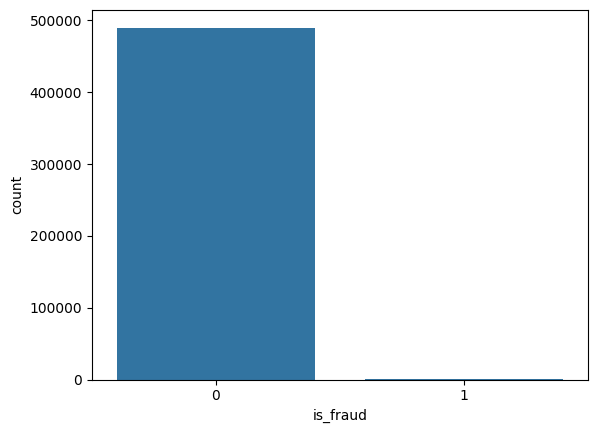

In [32]:
import seaborn as sns
sns.countplot(x="is_fraud", data=df)

### 바로 이전 거래와의 시간 차이를 계산하여 time_diff 변수 생성
사기 거래는 짧은 시간 간격으로 여러 차례 연속적으로 발생하는 경향이 있음    
첫 거래는 (시간 차가 없어서) NaN이므로 0으로 처리

In [33]:
df = df.sort_values(["cc_num", "trans_date_trans_time"])

df["time_diff"] = df.groupby("cc_num")["trans_date_trans_time"].diff().dt.total_seconds()

df["time_diff"] = df["time_diff"].fillna(0)

In [34]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,...,is_fraud,cc_num_masked,age,hour,weekday,is_night,amt_log,high_amt_flag,distance,time_diff
55,2019-01-01 04:34:51,503874407318,"fraud_Lind, Huel and McClure",gas_transport,63.89,M,29.5894,-98.5201,1595797,Exhibition designer,...,0,5038********,44,4,1,1,4.172694,1,126.747691,0.0
238,2019-01-01 14:14:18,503874407318,"fraud_Runolfsdottir, Mueller and Hand",entertainment,40.75,M,29.5894,-98.5201,1595797,Exhibition designer,...,0,5038********,44,14,1,0,3.731699,0,68.100675,34767.0
502,2019-01-01 20:49:42,503874407318,fraud_Will Ltd,food_dining,105.78,M,29.5894,-98.5201,1595797,Exhibition designer,...,0,5038********,44,20,1,0,4.670771,1,98.719205,23724.0
529,2019-01-01 21:23:54,503874407318,fraud_Dickinson-Rempel,misc_pos,92.64,M,29.5894,-98.5201,1595797,Exhibition designer,...,0,5038********,44,21,1,0,4.539458,1,45.552896,2052.0
709,2019-01-02 11:49:04,503874407318,fraud_Murray Ltd,grocery_net,28.43,M,29.5894,-98.5201,1595797,Exhibition designer,...,0,5038********,44,11,2,0,3.382015,0,93.208323,51910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490237,2020-12-31 01:18:33,4956828990005111019,fraud_Vandervort-Funk,grocery_pos,93.85,M,40.6747,-74.2239,124967,Operational researcher,...,0,4956***************,39,1,3,1,4.552297,1,27.025373,2605.0
490257,2020-12-31 02:23:34,4956828990005111019,fraud_Wuckert-Walter,grocery_net,66.16,M,40.6747,-74.2239,124967,Operational researcher,...,0,4956***************,39,2,3,1,4.207078,1,91.340765,3901.0
490635,2020-12-31 14:57:29,4956828990005111019,"fraud_Koss, Hansen and Lueilwitz",home,45.81,M,40.6747,-74.2239,124967,Operational researcher,...,0,4956***************,39,14,3,0,3.846097,1,31.239094,45235.0
490755,2020-12-31 17:13:42,4956828990005111019,"fraud_Kihn, Brakus and Goyette",personal_care,35.85,M,40.6747,-74.2239,124967,Operational researcher,...,0,4956***************,39,17,3,0,3.606856,0,76.787071,8173.0


### 사기 여부(is_fraud)에 따른 거래 간 시간 간격(time_diff) 분포 비교
그려봤는데 어떻게 해석해야할지 잘 모르겠음...    
boxplot에 대한 이해가 부족한 상태인 듯

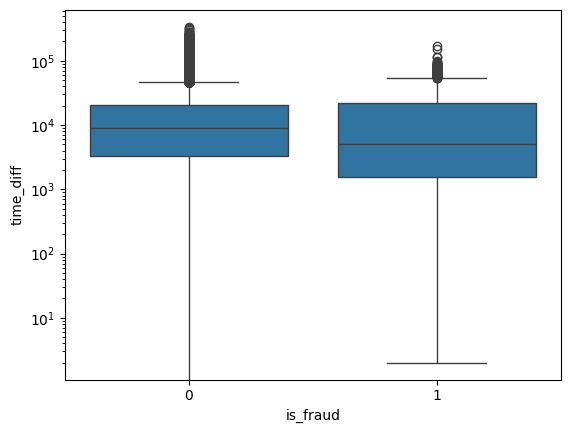

In [35]:
import matplotlib.pyplot as plt

# 사기 거래 vs 정상 거래 시간 간격 분포
sns.boxplot(x="is_fraud", y="time_diff", data=df)
plt.yscale("log")  # 초 단위 차이가 매우 커서 로그 스케일로
plt.show()


짧은 시간 내 연속 거래 여부(rapid_txn_flag) 파생 변수 생성

In [36]:
df["rapid_txn_flag"] = (df["time_diff"] <= 600).astype(int)   # 600초 = 10분

정상 거래의 time_diff는 더 넓게 퍼져있다    
윗 부분 outlier가 매우 큼    
사기 거래는 outlier 개수가 적고 최대치도 정상 거래보다 낮다

<Axes: xlabel='is_fraud', ylabel='time_diff'>

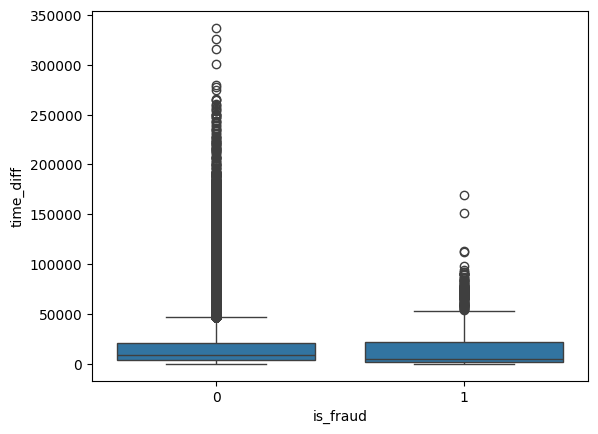

In [37]:
sns.boxplot(x="is_fraud", y="time_diff", data=df)

time_diff(거래 간 시간 차이)를 이해하기 쉬운 구간별 범주(bin)로 변환    
수치형 변수(time_diff)를 범주형 변수(time_diff_bin)로 변환하였다    
연속값(time_diff)을 구간별로 나눠 라벨을 붙임

In [38]:
bins = [-1, 60, 3600, 86400, float('inf')]  # 초 단위: 1분, 1시간, 1일, 그 이상
labels = ['<1min', '1min~1hr', '1hr~1day', '>1day']

df['time_diff_bin'] = pd.cut(df['time_diff'], bins=bins, labels=labels)

각 시간 구간별 거래 건수와 사기 발생 비율을 계산    
해당 구간에서 사기 거래가 발생한 비율(fraud_rate)과 해당 구간의 전체 거래 건수(count)

In [39]:
fraud_rate_by_bin = df.groupby('time_diff_bin')['is_fraud'].mean()
count_by_bin = df['time_diff_bin'].value_counts().sort_index()

print(pd.DataFrame({'count': count_by_bin, 'fraud_rate': fraud_rate_by_bin}))

                count  fraud_rate
time_diff_bin                    
<1min            2947    0.006447
1min~1hr       127435    0.003994
1hr~1day       355268    0.001968
>1day            5484    0.003100


/tmp/ipython-input-627861512.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate_by_bin = df.groupby('time_diff_bin')['is_fraud'].mean()


### 시간 간격 구간(time_diff_bin)별 사기율(Fraud Rate) 시각화
1분 이내 연속 거래에서 제일 높음    
매우 짧은 시간 안에 연속 거래가 이루어지면 사기일 가능성이 가장 크다

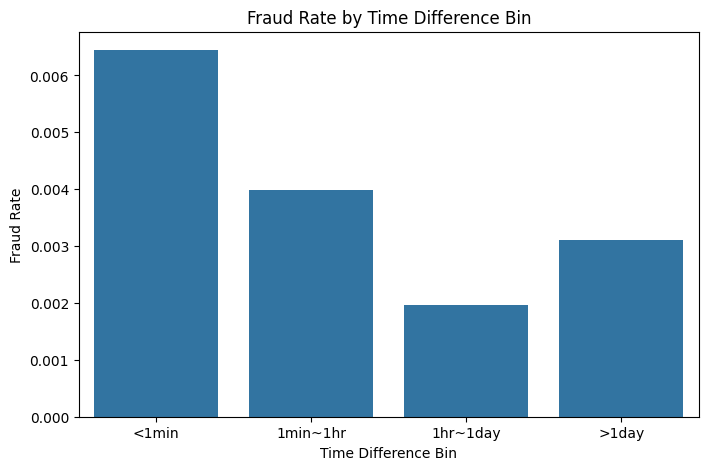

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=fraud_rate_by_bin.index, y=fraud_rate_by_bin.values)
plt.title("Fraud Rate by Time Difference Bin")
plt.ylabel("Fraud Rate")
plt.xlabel("Time Difference Bin")
plt.show()

고객 위치와 가맹점 위치 간 거리를 구간화

In [41]:
bins = [0, 5, 20, 100, float("inf")]
labels = ["0~5km", "5~20km", "20~100km", ">100km"]

df["distance_bin"] = pd.cut(df["distance"], bins=bins, labels=labels)

거리 구간별 사기 발생 비율

In [42]:
df.groupby("distance_bin")["is_fraud"].mean()

/tmp/ipython-input-161647226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("distance_bin")["is_fraud"].mean()


,is_fraud
distance_bin,
0~5km,0.002000
5~20km,0.002292
20~100km,0.002531
>100km,0.002574


# 회고
feature engineering을 한다고 해봤는데 잘 했는지 모르겠다.    
좀 더 배우고 좀 더 생각하고 좀 더 잘 할 수 있도록 해보자...    
내가 지금 자세히 모르지만 어쨌든 유용하거나 흥미로운 영역이 있음을 어렴풋하게나마 느꼈다.    
